##  Mini Project:Facial Emotion Recognition Dataset

## Problem Statement:
The problem with facial emotion recognition (FER) is identifying and classifying emotions from facial expressions using computer vision and artificial intelligence. While FER offers potential applications in various fields, it's not always accurate due to the nuances of human expressions, contextual factors, and technical limitations. 

## Data Collection:
Use the Kaggle Emotion Dectection From Text predicto which contains. Download if from Kaggle

https://www.kaggle.com/datasets/tapakah68/facial-emotion-recognition

In [1]:
import numpy as pandas
import pandas as pd

In [16]:
data = pd.read_csv(r"C:\Users\Hemavarshini\Downloads\archive (32)\emotions.csv")

In [17]:
data

,set_id,gender,age,country
0,0,FEMALE,36,RU
1,1,FEMALE,37,RU
2,2,FEMALE,36,RU
3,3,MALE,29,RU
4,4,FEMALE,43,RU
5,5,MALE,49,RU
6,6,FEMALE,38,RU
7,7,MALE,19,PH
8,8,FEMALE,29,RU
9,9,FEMALE,32,RU


In [18]:
data.head()

,set_id,gender,age,country
0,0,FEMALE,36,RU
1,1,FEMALE,37,RU
2,2,FEMALE,36,RU
3,3,MALE,29,RU
4,4,FEMALE,43,RU


In [19]:
data.tail()

,set_id,gender,age,country
14,14,FEMALE,20,RU
15,15,FEMALE,18,RU
16,16,FEMALE,37,RU
17,17,FEMALE,24,RU
18,18,MALE,19,RU


In [20]:
data.describe()

,set_id,age
count,19.000000,19.000000
mean,9.000000,31.105263
std,5.627314,9.683289
min,0.000000,15.000000
25%,4.500000,22.000000
50%,9.000000,33.000000
75%,13.500000,37.000000
max,18.000000,49.000000


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   set_id   19 non-null     int64 
 1   gender   19 non-null     object
 2   age      19 non-null     int64 
 3   country  19 non-null     object
dtypes: int64(2), object(2)
memory usage: 740.0+ bytes


In [22]:
data.isnull()

,set_id,gender,age,country
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
5,False,False,False,False
6,False,False,False,False
7,False,False,False,False
8,False,False,False,False
9,False,False,False,False


In [23]:
data.isnull().sum()

set_id     0
gender     0
age        0
country    0
dtype: int64

In [24]:
data.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
dtype: bool

In [25]:
data.duplicated().sum()

0

In [26]:
data.ndim

2

In [27]:
data.columns

Index(['set_id', 'gender', 'age', 'country'], dtype='object')

## Label Encoder

In [38]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

In [39]:
X = data.drop(columns=['country'])
y = data['country']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## Libraries

In [40]:
import tensorflow as tf

In [41]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

## Train and Test

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

## Single Layer Perceptron(SLP)

In [43]:
slp_model = Sequential([
    Dense(1, activation='sigmoid', input_shape=(X_train.shape[1],))
])

C:\Users\Hemavarshini\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Compile the data

In [44]:
slp_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

## Fit the data

In [45]:
slp_model.fit(X_train, y_train, epochs=20, batch_size=42, validation_data=(X_test, y_test))

Epoch 1/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 394ms/step - accuracy: 0.1333 - loss: 0.3874 - val_accuracy: 0.0000e+00 - val_loss: 3.0156
Epoch 2/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.1333 - loss: 0.3857 - val_accuracy: 0.0000e+00 - val_loss: 3.0147
Epoch 3/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.1333 - loss: 0.3840 - val_accuracy: 0.0000e+00 - val_loss: 3.0138
Epoch 4/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.1333 - loss: 0.3822 - val_accuracy: 0.0000e+00 - val_loss: 3.0129
Epoch 5/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.1333 - loss: 0.3805 - val_accuracy: 0.0000e+00 - val_loss: 3.0120
Epoch 6/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.1333 - loss: 0.3788 - val_accuracy: 0.0000e+00 - val_loss: 3.0111
Epoch 7/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.1333 - loss: 0.3771 - val_accuracy: 0.0000e+00 - val_loss: 3.0102
Epoch 8/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.1333 - loss: 0.3753 - val_accurac

## Predict the data

In [46]:
y_pred_slp = (slp_model.predict(X_test) > 0.5).astype("int32")
print(classification_report(y_test, y_pred_slp))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       0.0
           1       0.00      0.00      0.00       0.0
           2       0.00      0.00      0.00       4.0

    accuracy                           0.00       4.0
   macro avg       0.00      0.00      0.00       4.0
weighted avg       0.00      0.00      0.00       4.0



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklea

## Multi-Layer Perceptron(MLP)

In [47]:
mlp_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

C:\Users\Hemavarshini\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Compile the data

In [48]:
mlp_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

## Fit the data

In [49]:
mlp_model.fit(X_train, y_train, epochs=10, batch_size=52, validation_data=(X_test, y_test))

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 596ms/step - accuracy: 0.1333 - loss: 0.6661 - val_accuracy: 0.0000e+00 - val_loss: 0.6951
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.1333 - loss: 0.6230 - val_accuracy: 0.0000e+00 - val_loss: 0.6234
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.1333 - loss: 0.5809 - val_accuracy: 0.0000e+00 - val_loss: 0.5520
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.0667 - loss: 0.5383 - val_accuracy: 0.0000e+00 - val_loss: 0.4811
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.0667 - loss: 0.4953 - val_accuracy: 0.0000e+00 - val_loss: 0.4107
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.0667 - loss: 0.4527 - val_accuracy: 0.0000e+00 - val_loss: 0.3403
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.0667 - loss: 0.4109 - val_accuracy: 0.0000e+00 - val_loss: 0.2702
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.0667 - loss: 0.3693 - val_accurac

## Predict the data

In [50]:
y_pred_mlp = (mlp_model.predict(X_test) > 0.5).astype("int32")
print(classification_report(y_test, y_pred_mlp))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
              precision    recall  f1-score   support

           1       0.00      0.00      0.00       0.0
           2       0.00      0.00      0.00       4.0

    accuracy                           0.00       4.0
   macro avg       0.00      0.00      0.00       4.0
weighted avg       0.00      0.00      0.00       4.0



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklea

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GlobalAveragePooling1D, Dense

Epoch 1/10


C:\Users\Hemavarshini\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 673ms/step - accuracy: 0.0667 - loss: 2.6374 - val_accuracy: 0.0000e+00 - val_loss: 2.6499
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step - accuracy: 0.1333 - loss: 2.6317 - val_accuracy: 0.0000e+00 - val_loss: 2.6567
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.1333 - loss: 2.6275 - val_accuracy: 0.0000e+00 - val_loss: 2.6636
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.1333 - loss: 2.6231 - val_accuracy: 0.0000e+00 - val_loss: 2.6713
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.1333 - loss: 2.6186 - val_accuracy: 0.0000e+00 - val_loss: 2.6794
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.1333 - loss: 2.6141 - val_accuracy: 0.0000e+00 - val_loss: 2.6882
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.1333 - loss: 2.6094 - val_accuracy: 0.0000e+00 - val_loss: 2.6976
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step - accuracy: 0.1333 - loss: 2.6046 - val_accuracy: 0.0000

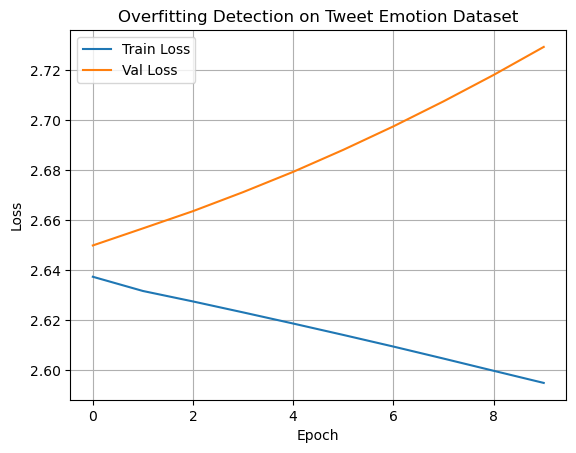

In [52]:
df = pd.read_csv(r"C:\Users\Hemavarshini\Downloads\archive (32)\emotions.csv")


texts = df['gender'].astype(str)  
labels = df['age']


label_encoder = LabelEncoder()
y = label_encoder.fit_transform(labels)


tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
X = pad_sequences(sequences, maxlen=100)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = Sequential([
    Embedding(input_dim=10000, output_dim=64, input_length=100),
    GlobalAveragePooling1D(),
    Dense(64, activation='relu'),
    Dense(len(set(y)), activation='softmax')
])

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))


plt.plot(history.history['loss'], label='Train Loss') 
plt.plot(history.history['val_loss'], label='Val Loss') 
plt.title('Overfitting Detection on Tweet Emotion Dataset')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


## Confusion Matrix

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


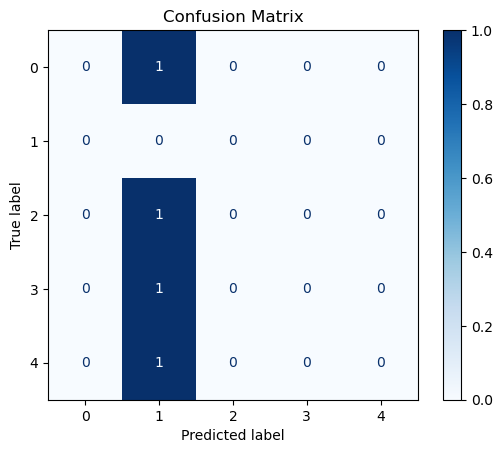

In [54]:
import numpy as np

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
if len(y_test.shape) > 1 and y_test.shape[1] > 1:
    y_test_labels = np.argmax(y_test, axis=1)
else:
    y_test_labels = y_test

 
y_pred = model.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)

cm = confusion_matrix(y_test_labels, y_pred_labels)

num_classes = cm.shape[0]
display_labels = [str(i) for i in range(num_classes)]

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=display_labels)
disp.plot(cmap='Blues', values_format='d')

plt.title("Confusion Matrix")
plt.show()

## Visualization

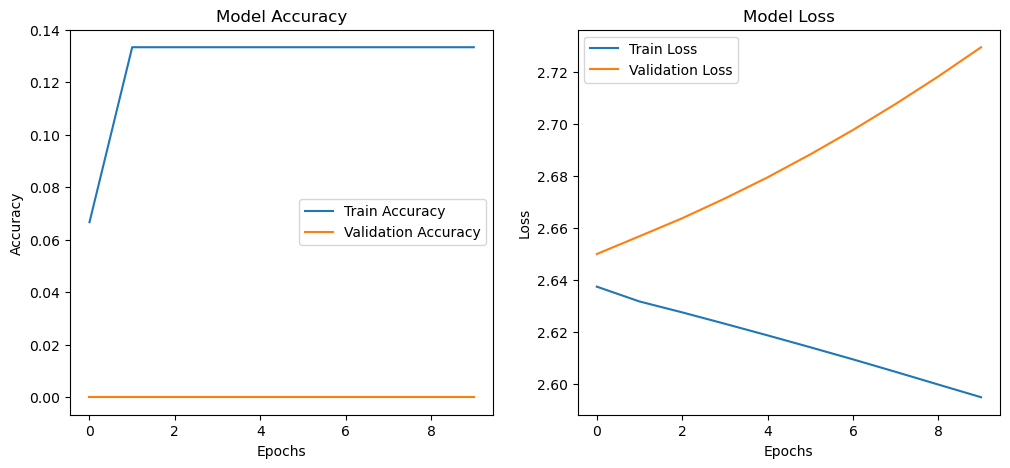

In [55]:
import matplotlib.pyplot as plt

history = model.history.history

plt.figure(figsize=(12, 5))

# Plot Accuracy
plt.subplot(1, 2, 1)
plt.plot(history['accuracy'], label='Train Accuracy')
plt.plot(history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history['loss'], label='Train Loss')
plt.plot(history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend()

plt.show()
